In [1]:
from moredata.datasets import get_path
import pandas as pd

df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]
#df.to_json('./data/airbnb-berlin.json', orient='records')

/home/kali/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#Geopandas
from moredata.utils import geodesic_point_buffer
from moredata.datasets import get_path
import pandas as pd
import json
from shapely.geometry import Polygon
from moredata import Enricher, FunctionalRegionConnector, EnricherBuilder
from moredata.models.data import GeopandasData
import geopandas

df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]

#1 - tranformar o df em GeoDataframe
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

#2 - aplicar set_crs no df
gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)
gdf['geometry'] = gdf.geometry.buffer(50)

#3 - criar um GeopandasData
gdf = GeopandasData().from_geodataframe(gdf)

region_artwork_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/artwork.csv.gz'],key='artwork'))
region_gallery_enricher= Enricher(connector=FunctionalRegionConnector(files=['./data/places/gallery.csv.gz'],key='gallery'))
region_hotel_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/hotel.csv.gz'],key='hotel'))
region_information_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/information.csv.gz'],key='information'))
region_museum_enricher = Enricher(connector=FunctionalRegionConnector(files=['./data/places/museum.csv.gz'],key='museum'))



user_enriched = EnricherBuilder(gdf).with_enrichment(region_artwork_enricher).with_enrichment(region_gallery_enricher).with_enrichment(region_hotel_enricher).with_enrichment(region_information_enricher).with_enrichment(region_museum_enricher)
user_enriched.get_result()

/home/kali/github/more-data/moredata/enricher/osm/functional_region_connector.py:50: DtypeWarning: Columns (14,19,30,35,42,46,51,52,54,55,77,80,94,95,96,98,99,100,101,102,103,116,117,118,126,131,132,138,142,146,153,159,160,175,176,180,184,191,196,197,205,210,211,212,215,216,217,218,219,220,221,223,228,229,230,233,244,246,249,252,253,256,259,261,262,263,268,281,283,322,323,324,325,332,333,334,339,340,344,353,361,370,373,374,379,393,394,396,399,426,476,488,489) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(f)
/home/kali/github/more-data/moredata/enricher/osm/functional_region_connector.py:110: DtypeWarning: Columns (14,19,30,35,42,46,51,52,54,55,77,80,94,95,96,98,99,100,101,102,103,116,117,118,126,131,132,138,142,146,153,159,160,175,176,180,184,191,196,197,205,210,211,212,215,216,217,218,219,220,221,223,228,229,230,233,244,246,249,252,253,256,259,261,262,263,268,281,283,322,323,324,325,332,333,334,339,340,344,353,361,370,373,374,379,393,394

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 256 entries, 92 to 19683
Columns: 531 entries, index to railway
dtypes: float64(377), geometry(1), int64(3), object(150)
memory usage: 1.0+ MB
None
18022    6
6334     4
4090     4
3634     4
6045     4
        ..
5900     1
5973     1
6053     1
6117     1
19683    1
Length: 212, dtype: int64
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 147 entries, 227 to 19500
Columns: 532 entries, index to railway
dtypes: float64(458), geometry(1), int64(3), object(70)
memory usage: 612.1+ KB
None
244      2
815      2
3406     2
17842    2
12180    2
        ..
1591     1
1575     1
12857    1
5965     1
19500    1
Length: 138, dtype: int64
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 569 entries, 35 to 19851
Columns: 533 entries, index to railway
dtypes: float64(377), geometry(1), int64(3), object(152)
memory usage: 2.3+ MB
None
15088    3
15817    2
4555     2
16038    2
17004    2
        ..
5117     1
4916     

/home/kali/github/more-data/moredata/enricher/osm/functional_region_connector.py:50: DtypeWarning: Columns (7,8,9,20,26,30,42,43,46,50,51,55,56,57,65,93,98,104,107,108,109,110,112,113,114,115,116,125,128,133,136,137,143,147,155,160,167,169,172,173,176,179,181,182,183,184,193,195,216,223,228,229,231,239,240,241,242,243,247,256,299,300,311,314,316,321,327,328,329,336,338,340,342,343,345,346,351,352,355,356,357,393,396,399,427,466,467) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(f)
/home/kali/github/more-data/moredata/enricher/osm/functional_region_connector.py:110: DtypeWarning: Columns (7,8,9,20,26,30,42,43,46,50,51,55,56,57,65,93,98,104,107,108,109,110,112,113,114,115,116,125,128,133,136,137,143,147,155,160,167,169,172,173,176,179,181,182,183,184,193,195,216,223,228,229,231,239,240,241,242,243,247,256,299,300,311,314,316,321,327,328,329,336,338,340,342,343,345,346,351,352,355,356,357,393,396,399,427,466,467) have mixed types. Specify dt

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 305 entries, 35 to 19836
Columns: 534 entries, index to railway
dtypes: float64(410), geometry(1), int64(3), object(120)
memory usage: 1.2+ MB
None
15398    3
6394     3
19378    3
10097    2
3354     2
        ..
12903    1
13120    1
13525    1
3888     1
19836    1
Length: 275, dtype: int64
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 110 entries, 103 to 19348
Columns: 535 entries, index to railway
dtypes: float64(389), geometry(1), int64(3), object(142)
memory usage: 460.6+ KB
None
13526    2
8976     2
13524    2
13529    2
13530    2
        ..
2658     1
10500    1
8151     1
5727     1
19348    1
Length: 98, dtype: int64


In [1]:
#Dask
from moredata.utils import geodesic_point_buffer
from moredata.datasets import get_path
import pandas as pd
import json
from shapely.geometry import Polygon
from moredata import Enricher, FunctionalRegionConnector, EnricherBuilder
from moredata.models.data import GeopandasData
import geopandas

df2 = pd.read_csv(get_path("airbnb-berlin-main"))
df2 = df2.loc[(~df2['latitude'].isna()) & (~df2['longitude'].isna())]

#1 - tranformar o df em GeoDataframe
gdf2 = geopandas.GeoDataFrame(df2, geometry=geopandas.points_from_xy(df2.longitude, df2.latitude))

#2 - aplicar set_crs no df
gdf2 = gdf2.set_crs(epsg=4326).to_crs(epsg=3857)
gdf2['geometry'] = gdf2.geometry.buffer(50)

#3 - criar um GeopandasData
gdf2 = GeopandasData().from_geodataframe(gdf2, parallel=True)

region_artwork_enricher2 = Enricher(connector=FunctionalRegionConnector(files=['./data/places/artwork.csv.gz'],key='artwork'))
region_gallery_enricher2= Enricher(connector=FunctionalRegionConnector(files=['./data/places/gallery.csv.gz'],key='gallery'))
region_hotel_enricher2 = Enricher(connector=FunctionalRegionConnector(files=['./data/places/hotel.csv.gz'],key='hotel'))
region_information_enricher2 = Enricher(connector=FunctionalRegionConnector(files=['./data/places/information.csv.gz'],key='information'))
region_museum_enricher2 = Enricher(connector=FunctionalRegionConnector(files=['./data/places/museum.csv.gz'],key='museum'))



user_enriched2 = EnricherBuilder(gdf2).with_enrichment(region_artwork_enricher2).with_enrichment(region_gallery_enricher2).with_enrichment(region_hotel_enricher2).with_enrichment(region_information_enricher2).with_enrichment(region_museum_enricher2)
user_enriched2.get_result()

/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


NameError: name 'gdf' is not defined

In [6]:
data.data.describe()

,latitude,longitude,artwork,gallery,hotel,information,museum
count,19858.000000,19858.000000,19857.0,19857.0,19857.0,19857.0,19857.0
mean,52.507632,13.403739,1.0,1.0,1.0,1.0,1.0
std,0.366925,0.107804,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
25%,52.489850,13.367815,1.0,1.0,1.0,1.0,1.0
50%,52.509910,13.413860,1.0,1.0,1.0,1.0,1.0
75%,52.533090,13.438897,1.0,1.0,1.0,1.0,1.0
max,52.655980,13.757580,1.0,1.0,1.0,1.0,1.0


In [5]:
import pandas as pd
import numpy as np
import json
from json import JSONDecodeError
import re

tourism = pd.read_csv('./data/tourism.csv.gz', index_col=0)
for index, x in tourism.iterrows():
    if not type(x['tags']) is float:

        j = re.sub(r'(?<=[\w])[\'\"](?=[\w])',"\\'", x['tags']).replace('\'', '\"')
        j = re.sub("(\"[\s\w]*)\"([\s\w-]*\")\"", r"\1\2", j)
        j = re.sub("\"(\"[\s\w]*)\"([\s\w]*)", r"\1\2", j)
        j = re.sub("\"([\s\w+,]*)([\s\w]*\")\"", r"\1\2", j)
        j = re.sub("\"([\s\w]*)\"([\s\w]*)\"", r'"\1\2"', j)
        j = re.sub("\"([\s\w]*)\"([\s\w.]*)([.\"])", r'"\1\2\3', j)
        try:
            j = json.loads(j)
            tourism.loc[index, 'value'] = j['tourism']
        except JSONDecodeError as e:
            tourism.loc[index, 'value'] = np.nan

/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,2

In [6]:
tourism['value'].value_counts()

information     2149
artwork         1409
hotel            667
museum           217
gallery          205
attraction       202
viewpoint        171
hostel           115
guest_house      108
picnic_site       93
apartment         37
zoo               35
camp_site         13
chalet            13
theme_park         8
caravan_site       8
yes                7
motel              5
aquarium           2
spa_resort         2
highlight          1
tower_viewer       1
day_spa            1
lean_to            1
bench              1
luggage            1
history            1
Name: value, dtype: int64

In [8]:
names = tourism['value'].value_counts()[:5].index.tolist()
for x in names:
    tourism.loc[tourism['value']==x].to_csv(f'./data/{x}.csv.gz', compression='gzip', index=False)

In [11]:
DATA_SAVE_DIR = '/home/thomas/github/more-data/examples/osm/data/'
## The functional region connector use the tourism.csv.gz downloaded from osm_downloader.ipynb
import moredata
from glob import glob
import os

places_files = glob('./data/places/*.csv.gz')

data = moredata.models.GeopandasData(data_file='./data/airbnb-berlin-enriched-0.json',
                            parser=moredata.parser.parse_document)
for p in places_files:
    key_name = os.path.basename(p).split('.')[0]
    connector = moredata.enricher.osm.FunctionalRegionConnector(files=[p],
                                                                key=key_name)
    data_enriched = connector.enrich(data)
    moredata.utils.write_json_generator_to_json(DATA_SAVE_DIR+key_name, data_enriched, 100000)
    data = moredata.models.GeopandasData(data_file=DATA_SAVE_DIR+key_name+"-0.json",
                            parser=moredata.parser.parse_document)

/home/thomas/github/more-data/moredata/enricher/osm/functional_region_connector.py:112: DtypeWarning: Columns (7,8,9,20,26,30,42,43,46,50,51,55,56,57,65,93,98,104,107,108,109,110,112,113,114,115,116,125,128,133,136,137,143,147,155,160,167,169,172,173,176,179,181,182,183,184,193,195,216,223,228,229,231,239,240,241,242,243,247,256,299,300,311,314,316,321,327,328,329,336,338,340,342,343,345,346,351,352,355,356,357,393,396,399,427,466,467) have mixed types.Specify dtype option on import or set low_memory=False.
  self._get_polygons()
/home/thomas/github/more-data/moredata/enricher/osm/functional_region_connector.py:112: DtypeWarning: Columns (14,19,30,35,42,46,51,52,54,55,77,80,94,95,96,98,99,100,101,102,103,116,117,118,126,131,132,138,142,146,153,159,160,175,176,180,184,191,196,197,205,210,211,212,215,216,217,218,219,220,221,223,228,229,230,233,244,246,249,252,253,256,259,261,262,263,268,281,283,322,323,324,325,332,333,334,339,340,344,353,361,370,373,374,379,393,394,396,399,426,476,488,48

In [11]:
df = pd.read_json(DATA_SAVE_DIR+'museum-0.json', orient='records')
df.head()

ValueError: Expected object or value

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

names = ['artwork', 'hotel', 'museum', 'information', 'attraction']
plot_df = df[['price', 'artwork', 'hotel', 'museum', 'information', 'attraction']]
plot_df['price'] = plot_df['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
for n in names:
    sns.scatterplot(x=n, y='price', data=plot_df)
    plt.yscale('log')
    plt.show()

NameError: name 'df' is not defined

In [12]:
plot_df['total'] = df[['artwork', 'hotel', 'museum', 'information', 'attraction']].sum(axis=1)

/tmp/ipykernel_504675/813834920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['total'] = df[['artwork', 'hotel', 'museum', 'information', 'attraction']].sum(axis=1)


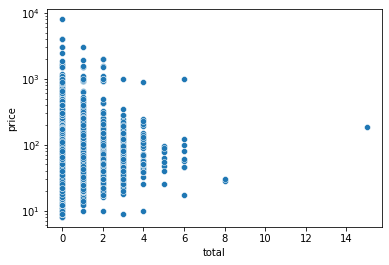

In [13]:
sns.scatterplot(x='total', y='price', data=plot_df)
plt.yscale('log')
plt.show()